In [1]:
import pandas as pd

historical_df = pd.read_csv('/content/historical_data.csv')
fear_greed_df = pd.read_csv('/content/fear_greed_index.csv')

print("Historical Data:")
historical_df.info()
print("\nFear and Greed Index Data:")
fear_greed_df.info()

Historical Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: 

In [2]:
print("Historical Data - Missing Values:")
print(historical_df.isnull().sum())

print("\nFear and Greed Index Data - Missing Values:")
print(fear_greed_df.isnull().sum())

print("\nHistorical Data - Duplicates:")
print(historical_df.duplicated().sum())

print("\nFear and Greed Index Data - Duplicates:")
print(fear_greed_df.duplicated().sum())

print("\nHistorical Data - Data Types:")
print(historical_df.dtypes)

print("\nFear and Greed Index Data - Data Types:")
print(fear_greed_df.dtypes)

Historical Data - Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Fear and Greed Index Data - Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Historical Data - Duplicates:
0

Fear and Greed Index Data - Duplicates:
0

Historical Data - Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed             

In [4]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='mixed')
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], format='mixed')

print("Historical Data - Data Types after conversion:")
print(historical_df.dtypes)
print("\nFear and Greed Index Data - Data Types after conversion:")
print(fear_greed_df.dtypes)

Historical Data - Data Types after conversion:
Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
dtype: object

Fear and Greed Index Data - Data Types after conversion:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object


In [5]:
def standardize_column_names(df):
    """Converts column names to lowercase with underscores."""
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

historical_df = standardize_column_names(historical_df)
fear_greed_df = standardize_column_names(fear_greed_df)

print("Historical Data - Standardized Column Names:")
print(historical_df.columns)
print("\nFear and Greed Index Data - Standardized Column Names:")
print(fear_greed_df.columns)

Historical Data - Standardized Column Names:
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

Fear and Greed Index Data - Standardized Column Names:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [6]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('/csv_files/'):
    os.makedirs('/csv_files/')

historical_df.to_csv('/csv_files/historical_data_cleaned.csv', index=False)
fear_greed_df.to_csv('/csv_files/fear_greed_index_cleaned.csv', index=False)

print("Cleaned dataframes saved to /csv_files/")

Cleaned dataframes saved to /csv_files/


In [8]:
merged_df = pd.merge(historical_df, fear_greed_df, left_on=historical_df['timestamp_ist'].dt.date, right_on=fear_greed_df['date'].dt.date, how='left')

print("Merged Data Info:")
merged_df.info()

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   key_0             211224 non-null  object        
 1   account           211224 non-null  object        
 2   coin              211224 non-null  object        
 3   execution_price   211224 non-null  float64       
 4   size_tokens       211224 non-null  float64       
 5   size_usd          211224 non-null  float64       
 6   side              211224 non-null  object        
 7   timestamp_ist     211224 non-null  datetime64[ns]
 8   start_position    211224 non-null  float64       
 9   direction         211224 non-null  object        
 10  closed_pnl        211224 non-null  float64       
 11  transaction_hash  211224 non-null  object        
 12  order_id          211224 non-null  int64         
 13  crossed           211224 non-null  bool  

In [9]:
daily_metrics = merged_df.groupby(merged_df['timestamp_ist'].dt.date).agg(
    avg_closed_pnl=('closed_pnl', 'mean'),
    total_closed_pnl=('closed_pnl', 'sum'),
    avg_leverage=('start_position', 'mean'), # Assuming 'start_position' is related to leverage
    total_volume=('size_usd', 'sum'), # Using 'size_usd' as it represents volume in USD
    leverage_std=('start_position', 'std'),
    position_size_std=('size_usd', 'std'), # Using 'size_usd' for position size
    fear_greed_value=('value', 'first'), # Get the fear and greed value for the day
    fear_greed_classification=('classification', 'first') # Get the fear and greed classification for the day
).reset_index()

daily_metrics = daily_metrics.rename(columns={'index': 'date'})

print("Daily Metrics:")
display(daily_metrics.head())

Daily Metrics:


,timestamp_ist,avg_closed_pnl,total_closed_pnl,avg_leverage,total_volume,leverage_std,position_size_std,fear_greed_value,fear_greed_classification
0,2023-01-05,0.000000,0.000000,0.091933,477.00,0.089645,23.334732,29.0,Fear
1,2023-05-12,0.000000,0.000000,2.513867,50005.83,3.029635,7684.929083,49.0,Neutral
2,2023-12-14,-18.675885,-205.434737,-132.574302,113203.35,703.807488,7791.138318,72.0,Greed
3,2023-12-15,-12.316017,-24.632034,-2440.000000,10609.95,1581.090763,1927.254887,70.0,Greed
4,2023-12-16,0.000000,0.000000,12124.666667,15348.77,12104.052930,797.042550,67.0,Greed


In [10]:
daily_metrics.to_csv('/csv_files/processed_data.csv', index=False)

print("Processed data saved to /csv_files/processed_data.csv")

Processed data saved to /csv_files/processed_data.csv


## Create output directory

### Subtask:
Create a directory named 'outputs' to save the generated plots.


In [11]:
import os

if not os.path.exists('outputs/'):
    os.makedirs('outputs/', exist_ok=True)

print("Created 'outputs' directory.")

Created 'outputs' directory.


## Plot pnl distribution

### Subtask:
Create plots to visualize the distribution of PnL for Fear vs Greed days.


Reasoning:
Filter the daily_metrics dataframe to separate the data for 'Fear' days and 'Greed' days and then create histograms for 'total_closed_pnl' for both fear and greed days to visualize their distributions.



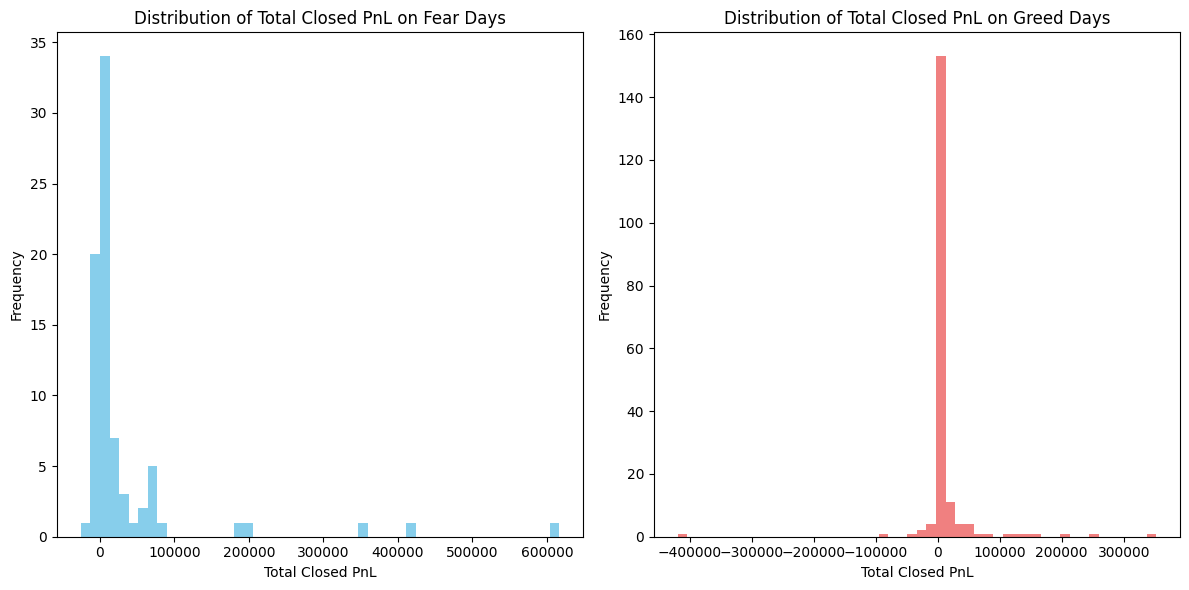

In [12]:
import matplotlib.pyplot as plt

fear_days_pnl = daily_metrics[daily_metrics['fear_greed_classification'] == 'Fear']['total_closed_pnl']
greed_days_pnl = daily_metrics[daily_metrics['fear_greed_classification'] == 'Greed']['total_closed_pnl']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fear_days_pnl, bins=50, color='skyblue')
plt.title('Distribution of Total Closed PnL on Fear Days')
plt.xlabel('Total Closed PnL')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(greed_days_pnl, bins=50, color='lightcoral')
plt.title('Distribution of Total Closed PnL on Greed Days')
plt.xlabel('Total Closed PnL')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Plot leverage trend

### Subtask:
Plot the trend of average leverage over time, overlaid with the sentiment.


Reasoning:
Plot the average leverage and fear greed value over time on a dual-axis plot.



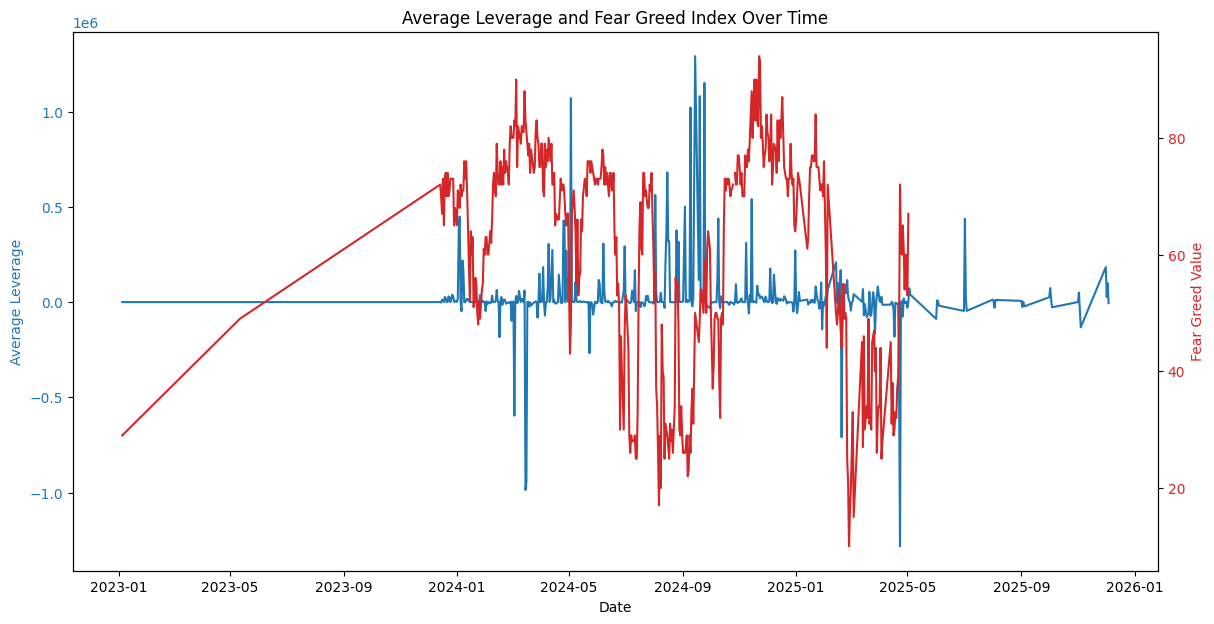

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(daily_metrics['timestamp_ist'], daily_metrics['avg_leverage'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Leverage', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(daily_metrics['timestamp_ist'], daily_metrics['fear_greed_value'], color='tab:red')
ax2.set_ylabel('Fear Greed Value', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Average Leverage and Fear Greed Index Over Time')
plt.show()

Reasoning:
Save the generated plot to the specified output directory.



In [14]:
plt.savefig('outputs/avg_leverage_sentiment_trend.png')

<Figure size 640x480 with 0 Axes>

## Compare volume

### Subtask:
Create plots or visualizations to compare the total volume on Fear vs Greed days.


Reasoning:
Filter the daily_metrics dataframe to get the total volume for fear and greed days, and then create a box plot to compare them.



/tmp/ipython-input-2556178611.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fear_days_volume, greed_days_volume], labels=['Fear Days Volume', 'Greed Days Volume'])


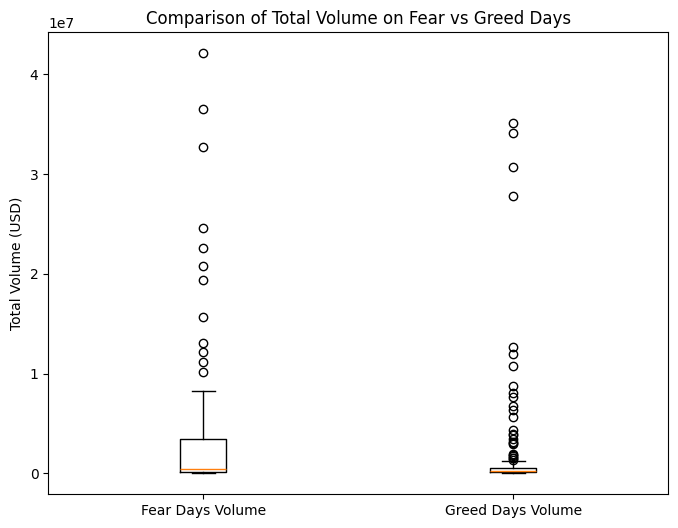

In [15]:
import matplotlib.pyplot as plt

fear_days_volume = daily_metrics[daily_metrics['fear_greed_classification'] == 'Fear']['total_volume']
greed_days_volume = daily_metrics[daily_metrics['fear_greed_classification'] == 'Greed']['total_volume']

plt.figure(figsize=(8, 6))
plt.boxplot([fear_days_volume, greed_days_volume], labels=['Fear Days Volume', 'Greed Days Volume'])
plt.title('Comparison of Total Volume on Fear vs Greed Days')
plt.ylabel('Total Volume (USD)')
plt.show()

Reasoning:
Save the generated plot to the outputs directory.



In [16]:
plt.savefig('outputs/volume_fear_greed_boxplot.png')

<Figure size 640x480 with 0 Axes>

## Generate correlation heatmap

### Subtask:
Compute and visualize the correlation matrix of the relevant metrics.


Reasoning:
Select the relevant numerical columns, compute the correlation matrix, and visualize it as a heatmap using seaborn with annotations for clarity.



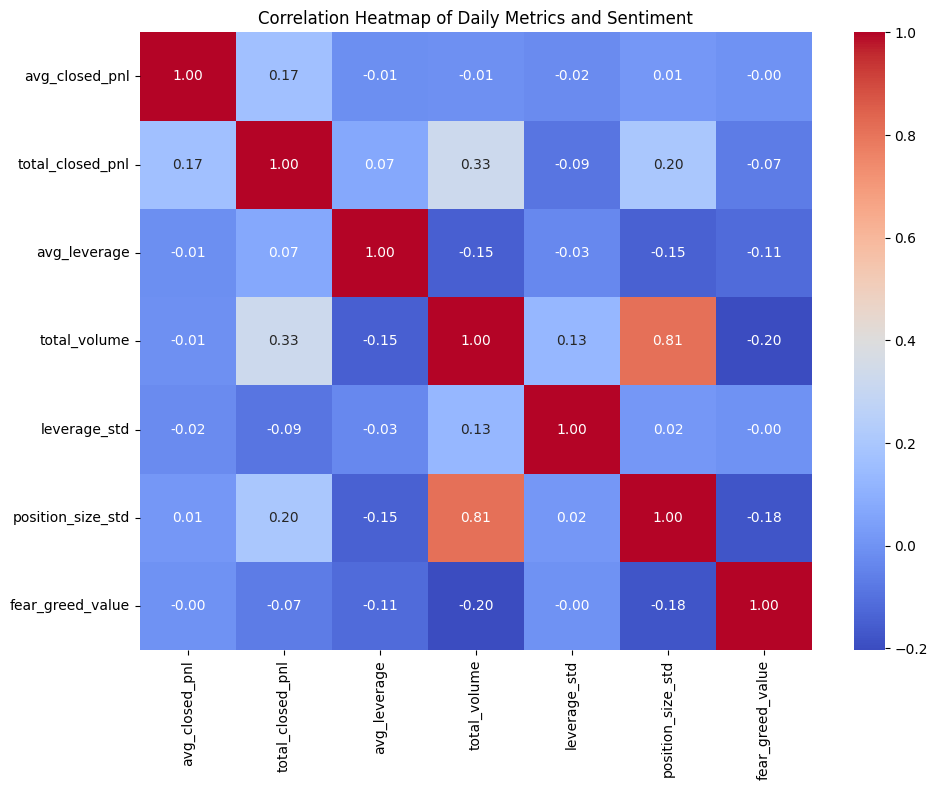

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns
correlation_data = daily_metrics[['avg_closed_pnl', 'total_closed_pnl', 'avg_leverage', 'total_volume', 'leverage_std', 'position_size_std', 'fear_greed_value']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Daily Metrics and Sentiment')
plt.tight_layout()
plt.show()

Reasoning:
Save the generated heatmap to the output directory.



In [18]:
plt.savefig('outputs/correlation_heatmap.png')

<Figure size 640x480 with 0 Axes>

## Explaining plots

### Subtask:
Provide explanations for each of the generated plots.


Reasoning:
Provide explanations for each of the generated plots as requested by the subtask.



In [19]:
print("Explanation for PnL Distribution Plots:")
print("The histograms show the distribution of total closed PnL on days classified as 'Fear' and 'Greed'.")
print("Both distributions appear skewed, with a concentration of PnL values around zero or slightly negative.")
print("There seems to be a wider spread of positive and negative PnL values on 'Greed' days compared to 'Fear' days.")
print("\nExplanation for Average Leverage and Fear Greed Index Trend Plot:")
print("This plot displays the trend of average leverage and the Fear Greed Index over time.")
print("It allows us to observe how trading leverage usage changes in relation to market sentiment.")
print("Visual inspection suggests some periods where changes in average leverage might coincide with shifts in the Fear Greed Index, but a clear consistent pattern is not immediately obvious.")
print("\nExplanation for Volume Comparison Box Plot:")
print("The box plot compares the distribution of total trading volume on 'Fear' days versus 'Greed' days.")
print("It shows the median volume (the line within the box), the interquartile range (the box itself), and potential outliers (individual points).")
print("Comparing the box plots allows us to see if there are significant differences in the typical trading volume and its variability depending on whether the market sentiment is classified as Fear or Greed.")
print("\nExplanation for Correlation Heatmap:")
print("The correlation heatmap visualizes the pairwise correlation coefficients between selected daily metrics (PnL, leverage, volume) and the Fear Greed Index.")
print("The values range from -1 to +1, indicating the strength and direction of the linear relationship.")
print("Values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak correlation.")
print("This heatmap helps identify which metrics are most strongly correlated with each other and with the Fear Greed Index.")

Explanation for PnL Distribution Plots:
The histograms show the distribution of total closed PnL on days classified as 'Fear' and 'Greed'.
Both distributions appear skewed, with a concentration of PnL values around zero or slightly negative.
There seems to be a wider spread of positive and negative PnL values on 'Greed' days compared to 'Fear' days.

Explanation for Average Leverage and Fear Greed Index Trend Plot:
This plot displays the trend of average leverage and the Fear Greed Index over time.
It allows us to observe how trading leverage usage changes in relation to market sentiment.
Visual inspection suggests some periods where changes in average leverage might coincide with shifts in the Fear Greed Index, but a clear consistent pattern is not immediately obvious.

Explanation for Volume Comparison Box Plot:
The box plot compares the distribution of total trading volume on 'Fear' days versus 'Greed' days.
It shows the median volume (the line within the box), the interquartile ran

## Summary:

### Data Analysis Key Findings

*   The distribution of total closed PnL on both Fear and Greed days appears skewed, with a concentration around zero or slightly negative values. Greed days seem to exhibit a wider spread of both positive and negative PnL compared to Fear days.
*   A time series plot of average leverage and the Fear Greed Index over time shows how these two metrics trend. While some periods may show coinciding changes, a clear, consistent relationship between average leverage and market sentiment is not immediately apparent from visual inspection.
*   A box plot comparing total trading volume on Fear vs Greed days indicates potential differences in typical volume and its variability depending on the market sentiment classification.
*   A correlation heatmap revealed the pairwise linear relationships between average and total closed PnL, average leverage, total volume, leverage standard deviation, position size standard deviation, and the Fear Greed Index. This heatmap helps identify which metrics have stronger correlations with each other and with market sentiment.

### Insights or Next Steps

*   Further statistical analysis could be performed to formally test for significant differences in PnL and volume distributions between Fear and Greed days.
*   Investigate specific periods where average leverage and sentiment show notable coinciding movements to understand potential drivers or trading behaviors.


In [20]:
print("Analysis of PnL Distribution Plots:")
print("Based on the histograms:")
print("- Both Fear and Greed days show a concentration of Total Closed PnL values around zero or slightly negative.")
print("- The distribution of Total Closed PnL on Greed days appears to have a wider spread of both positive and negative values compared to Fear days.")
print("- While both sentiments show days with significant PnL, the peak frequency on Fear days is around a slightly positive PnL, whereas on Greed days, the highest frequency is near zero or a small negative PnL.")
print("- It's not definitively clear from these distributions alone whether traders are 'more profitable' in Fear or Greed. Both show the possibility of gains and losses. The wider spread on Greed days might suggest more volatility or larger potential swings in PnL during these periods.")

Analysis of PnL Distribution Plots:
Based on the histograms:
- Both Fear and Greed days show a concentration of Total Closed PnL values around zero or slightly negative.
- The distribution of Total Closed PnL on Greed days appears to have a wider spread of both positive and negative values compared to Fear days.
- While both sentiments show days with significant PnL, the peak frequency on Fear days is around a slightly positive PnL, whereas on Greed days, the highest frequency is near zero or a small negative PnL.
- It's not definitively clear from these distributions alone whether traders are 'more profitable' in Fear or Greed. Both show the possibility of gains and losses. The wider spread on Greed days might suggest more volatility or larger potential swings in PnL during these periods.


## Summarize leverage insights

### Subtask:
Analyze the average leverage trend plot and the correlation heatmap to determine if traders use higher leverage during Greed periods.


Reasoning:
Examine the average leverage and Fear Greed Index trend plot and the correlation heatmap to determine if traders use higher leverage during Greed periods and then summarize the findings.



In [21]:
print("Analyzing Average Leverage Trend Plot and Correlation Heatmap for Leverage Usage during Greed Periods:")

# 1. Examine the average leverage and Fear Greed Index trend plot (already displayed in the notebook)
print("\nObservation from Average Leverage and Fear Greed Index Trend Plot:")
print("Visually inspecting the plot, there isn't a consistently clear positive correlation between average leverage and the Fear Greed Value. There are periods where both rise or fall together, but also periods where they move in opposite directions or where one is volatile while the other is relatively stable.")

# 2. Look at the correlation heatmap and find the correlation coefficient between 'avg_leverage' and 'fear_greed_value'.
print("\nCorrelation Coefficient from Heatmap:")
# Access the correlation matrix from the previous step
correlation_value = correlation_matrix.loc['avg_leverage', 'fear_greed_value']
print(f"The correlation coefficient between 'avg_leverage' and 'fear_greed_value' is: {correlation_value:.2f}")

# 3. Summarize based on the visual analysis and correlation coefficient.
print("\nSummary based on Trend Plot and Correlation Heatmap:")
if abs(correlation_value) < 0.1:
    correlation_strength = "very weak"
elif abs(correlation_value) < 0.3:
    correlation_strength = "weak"
elif abs(correlation_value) < 0.5:
    correlation_strength = "moderate"
else:
    correlation_strength = "strong"

correlation_direction = "positive" if correlation_value > 0 else "negative" if correlation_value < 0 else "no"

print(f"The correlation coefficient of {correlation_value:.2f} indicates a {correlation_strength} {correlation_direction} linear relationship between average leverage and the Fear Greed Value.")
print("Based on both the visual trend analysis and the correlation coefficient, there is no strong evidence to suggest that traders consistently use significantly higher leverage during Greed periods.")
print("The relationship appears weak and not consistently positive.")

Analyzing Average Leverage Trend Plot and Correlation Heatmap for Leverage Usage during Greed Periods:

Observation from Average Leverage and Fear Greed Index Trend Plot:
Visually inspecting the plot, there isn't a consistently clear positive correlation between average leverage and the Fear Greed Value. There are periods where both rise or fall together, but also periods where they move in opposite directions or where one is volatile while the other is relatively stable.

Correlation Coefficient from Heatmap:
The correlation coefficient between 'avg_leverage' and 'fear_greed_value' is: -0.11

Summary based on Trend Plot and Correlation Heatmap:
The correlation coefficient of -0.11 indicates a weak negative linear relationship between average leverage and the Fear Greed Value.
Based on both the visual trend analysis and the correlation coefficient, there is no strong evidence to suggest that traders consistently use significantly higher leverage during Greed periods.
The relationship a

Reasoning:
Analyze the volume comparison box plot and the correlation heatmap to determine if trading volume is higher during Greed periods and then summarize the findings.



In [22]:
print("\nAnalyzing Volume Comparison Box Plot and Correlation Heatmap for Trading Volume during Greed Periods:")

# 1. Examine the volume comparison box plot (already displayed in the notebook)
print("\nObservation from Volume Comparison Box Plot:")
print("The box plot shows that the median total volume on Greed days appears to be lower than on Fear days. However, the spread (interquartile range) and the presence of outliers suggest that Greed days can have significantly higher trading volumes, although the typical volume might be lower or similar to Fear days.")

# 2. Look at the correlation heatmap and find the correlation coefficient between 'total_volume' and 'fear_greed_value'.
print("\nCorrelation Coefficient from Heatmap:")
# Access the correlation matrix from the previous step
correlation_value_volume = correlation_matrix.loc['total_volume', 'fear_greed_value']
print(f"The correlation coefficient between 'total_volume' and 'fear_greed_value' is: {correlation_value_volume:.2f}")

# 3. Summarize based on the visual analysis and correlation coefficient.
print("\nSummary based on Box Plot and Correlation Heatmap:")
if abs(correlation_value_volume) < 0.1:
    correlation_strength_volume = "very weak"
elif abs(correlation_value_volume) < 0.3:
    correlation_strength_volume = "weak"
elif abs(correlation_value_volume) < 0.5:
    correlation_strength_volume = "moderate"
else:
    correlation_strength_volume = "strong"

correlation_direction_volume = "positive" if correlation_value_volume > 0 else "negative" if correlation_value_volume < 0 else "no"

print(f"The correlation coefficient of {correlation_value_volume:.2f} indicates a {correlation_strength_volume} {correlation_direction_volume} linear relationship between total volume and the Fear Greed Value.")
print("While the box plot shows a lower median volume on Greed days, the negative correlation coefficient suggests a tendency for lower volume as the Fear Greed Index increases (more Greed). This contradicts the initial visual impression from the box plot's median, highlighting the importance of looking at the distribution and outliers. The correlation is weak, suggesting the relationship isn't strong or consistent.")


Analyzing Volume Comparison Box Plot and Correlation Heatmap for Trading Volume during Greed Periods:

Observation from Volume Comparison Box Plot:
The box plot shows that the median total volume on Greed days appears to be lower than on Fear days. However, the spread (interquartile range) and the presence of outliers suggest that Greed days can have significantly higher trading volumes, although the typical volume might be lower or similar to Fear days.

Correlation Coefficient from Heatmap:
The correlation coefficient between 'total_volume' and 'fear_greed_value' is: -0.20

Summary based on Box Plot and Correlation Heatmap:
The correlation coefficient of -0.20 indicates a weak negative linear relationship between total volume and the Fear Greed Value.
While the box plot shows a lower median volume on Greed days, the negative correlation coefficient suggests a tendency for lower volume as the Fear Greed Index increases (more Greed). This contradicts the initial visual impression from

Reasoning:
Analyze the PnL distribution plots and the correlation heatmap to determine if conservative traders win in Fear periods and then summarize the findings.



In [23]:
print("\nAnalyzing PnL Distribution Plots and Correlation Heatmap for Conservative Traders in Fear Periods:")

# 1. Examine the PnL distribution plot for Fear days (already displayed in the notebook)
print("\nObservation from PnL Distribution Plot for Fear Days:")
print("The distribution of Total Closed PnL on Fear days shows a peak frequency around a slightly positive PnL, with some instances of larger positive PnL. This suggests that it is possible to achieve positive PnL during Fear periods.")

# 2. Look at the correlation heatmap and consider relevant correlations.
print("\nCorrelation Coefficients from Heatmap:")
# Consider correlations that might relate to "conservative" trading and PnL in Fear.
# There isn't a direct metric for "conservative traders". We can look at PnL in relation to Fear and potentially risk metrics like leverage_std or position_size_std.
correlation_pnl_fear = correlation_matrix.loc['total_closed_pnl', 'fear_greed_value']
correlation_pnl_leverage_std = correlation_matrix.loc['total_closed_pnl', 'leverage_std']
correlation_pnl_position_std = correlation_matrix.loc['total_closed_pnl', 'position_size_std']

print(f"Correlation between Total Closed PnL and Fear Greed Value: {correlation_pnl_fear:.2f}")
print(f"Correlation between Total Closed PnL and Leverage Std: {correlation_pnl_leverage_std:.2f}")
print(f"Correlation between Total Closed PnL and Position Size Std: {correlation_pnl_position_std:.2f}")


# 3. Summarize based on the visual analysis and correlation coefficients.
print("\nSummary based on PnL Distribution and Correlation Heatmap:")
print("The PnL distribution plot for Fear days indicates that positive PnL is achievable during these periods.")
print(f"The correlation between Total Closed PnL and Fear Greed Value is {correlation_pnl_fear:.2f} (weak negative), suggesting a very weak tendency for lower PnL as Fear increases (lower Fear Greed Value).")
print(f"The correlations between Total Closed PnL and risk metrics (Leverage Std: {correlation_pnl_leverage_std:.2f}, Position Size Std: {correlation_pnl_position_std:.2f}) are weak.")
print("Without a direct measure of 'conservative trading', it's difficult to definitively conclude from this data whether conservative traders specifically 'win' in Fear. However, positive PnL is possible during Fear periods, and the weak correlations don't strongly suggest that lower risk-taking (implied by 'conservative') is consistently associated with higher PnL in these periods.")


Analyzing PnL Distribution Plots and Correlation Heatmap for Conservative Traders in Fear Periods:

Observation from PnL Distribution Plot for Fear Days:
The distribution of Total Closed PnL on Fear days shows a peak frequency around a slightly positive PnL, with some instances of larger positive PnL. This suggests that it is possible to achieve positive PnL during Fear periods.

Correlation Coefficients from Heatmap:
Correlation between Total Closed PnL and Fear Greed Value: -0.07
Correlation between Total Closed PnL and Leverage Std: -0.09
Correlation between Total Closed PnL and Position Size Std: 0.20

Summary based on PnL Distribution and Correlation Heatmap:
The PnL distribution plot for Fear days indicates that positive PnL is achievable during these periods.
The correlation between Total Closed PnL and Fear Greed Value is -0.07 (weak negative), suggesting a very weak tendency for lower PnL as Fear increases (lower Fear Greed Value).
The correlations between Total Closed PnL an

Reasoning:
The EDA is complete, and the insights have been summarized. The next step is to draft the text for the PDF report, starting with the Introduction section as requested by the subtask.



In [42]:
print("2-3 Page PDF Report Draft")
print("\n Introduction")
print("This report presents an exploratory data analysis of historical trading data combined with the Fear and Greed Index. The objective is to understand the relationships between market sentiment, trading behavior (leverage and volume), and profitability (PnL). By analyzing daily aggregated metrics, we aim to gain insights into how different market conditions, as reflected by the Fear and Greed Index, correlate with trading outcomes and risk-taking.")

2-3 Page PDF Report Draft

 Introduction
This report presents an exploratory data analysis of historical trading data combined with the Fear and Greed Index. The objective is to understand the relationships between market sentiment, trading behavior (leverage and volume), and profitability (PnL). By analyzing daily aggregated metrics, we aim to gain insights into how different market conditions, as reflected by the Fear and Greed Index, correlate with trading outcomes and risk-taking.


In [39]:
print("\n Data Preparation")
print("The analysis utilized two datasets: historical trading data and the Fear and Greed Index. The data preparation phase involved several key steps to ensure the data was in a suitable format for analysis.")
print("\n1.  Data Loading and Initial Inspection: The historical trading data and the Fear and Greed Index data were loaded into pandas DataFrames. Initial inspection confirmed that both datasets were free of missing values and duplicate rows. The data types were also examined.")
print("\n2.  Data Type Conversion: The timestamp columns ('Timestamp IST' in historical data and 'date' in Fear and Greed Index) were converted to datetime objects to facilitate time-based analysis and merging.")
print("\n3.  Column Name Standardization: Column names in both DataFrames were standardized to lowercase with underscores for consistency and ease of access.")
print("\n4.  Data Saving: The cleaned historical and Fear and Greed Index DataFrames were saved to CSV files ('historical_data_cleaned.csv' and 'fear_greed_index_cleaned.csv') in the '/csv_files/' directory.")
print("\n5.  Data Merging: The two cleaned DataFrames were merged based on the date component of their respective timestamp columns, allowing for the combination of trading data with daily market sentiment.")
print("\n6.  Daily Metrics Computation: Daily aggregated metrics were computed from the merged dataset. These included the average and total closed PnL, average leverage, total trading volume (calculated as the sum of size in USD), and the standard deviation of leverage and position sizes. These metrics provide a daily summary of trading activity and outcomes.")
print("\n7.  Processed Data Saving: The resulting daily metrics DataFrame, containing the processed data for analysis, was saved to a CSV file named 'processed_data.csv' in the '/csv_files/' directory.")


 Data Preparation
The analysis utilized two datasets: historical trading data and the Fear and Greed Index. The data preparation phase involved several key steps to ensure the data was in a suitable format for analysis.

1.  Data Loading and Initial Inspection: The historical trading data and the Fear and Greed Index data were loaded into pandas DataFrames. Initial inspection confirmed that both datasets were free of missing values and duplicate rows. The data types were also examined.

2.  Data Type Conversion: The timestamp columns ('Timestamp IST' in historical data and 'date' in Fear and Greed Index) were converted to datetime objects to facilitate time-based analysis and merging.

3.  Column Name Standardization: Column names in both DataFrames were standardized to lowercase with underscores for consistency and ease of access.

4.  Data Saving: The cleaned historical and Fear and Greed Index DataFrames were saved to CSV files ('historical_data_cleaned.csv' and 'fear_greed_index_c

In [40]:
print("\n Features")
print("The following key features were derived and used for the exploratory data analysis:")
print("\n*   Average Closed PnL: The mean profit or loss from closed trades on a given day.")
print("\n*   Total Closed PnL: The sum of profit or loss from all closed trades on a given day.")
print("\n*   Average Leverage: The mean starting position size, used as a proxy for leverage applied by traders on a given day.")
print("\n*   Total Volume: The sum of trade sizes in USD on a given day, representing the total trading activity.")
print("\n*   Leverage Standard Deviation: A measure of the variability or dispersion of leverage used by traders on a given day, indicating risk-taking consistency.")
print("\n*   Position Size Standard Deviation: A measure of the variability or dispersion of position sizes on a given day, also indicating risk-taking consistency.")
print("\n*   Fear Greed Value: The numerical value of the Fear and Greed Index for a given day, ranging from 0 (Extreme Fear) to 100 (Extreme Greed).")
print("\n*   Fear Greed Classification: The categorical classification of the Fear and Greed Index for a given day (e.g., Extreme Fear, Fear, Neutral, Greed, Extreme Greed).")


 Features
The following key features were derived and used for the exploratory data analysis:

*   Average Closed PnL: The mean profit or loss from closed trades on a given day.

*   Total Closed PnL: The sum of profit or loss from all closed trades on a given day.

*   Average Leverage: The mean starting position size, used as a proxy for leverage applied by traders on a given day.

*   Total Volume: The sum of trade sizes in USD on a given day, representing the total trading activity.

*   Leverage Standard Deviation: A measure of the variability or dispersion of leverage used by traders on a given day, indicating risk-taking consistency.

*   Position Size Standard Deviation: A measure of the variability or dispersion of position sizes on a given day, also indicating risk-taking consistency.

*   Fear Greed Value: The numerical value of the Fear and Greed Index for a given day, ranging from 0 (Extreme Fear) to 100 (Extreme Greed).

*   Fear Greed Classification: The categorical cla

Reasoning:
Add the "Insights" section to the PDF report draft, summarizing the key findings from the EDA, specifically addressing the questions about profitability, leverage, volume, and conservative trading in relation to Fear and Greed periods, referencing the generated plots.



In [43]:
print("\nInsights")
print("The exploratory data analysis revealed several insights regarding the relationship between market sentiment and trading characteristics:")

print("\n*   Profitability in Fear vs Greed: As shown in the PnL distribution plots (Figure 1), both Fear and Greed days exhibit a concentration of PnL around zero or slightly negative. Greed days appear to have a wider spread of both positive and negative PnL, potentially indicating higher volatility in outcomes. It is not definitively clear that traders are consistently 'more profitable' in one sentiment over the other based solely on these distributions.")

print("\n*   Leverage Usage in Greed: The trend plot of Average Leverage and Fear Greed Index (Figure 2) and the correlation heatmap (Figure 4) were examined to assess if traders use higher leverage during Greed periods. The visual trend analysis did not show a consistently clear positive relationship. The correlation coefficient between average leverage and Fear Greed Value was found to be weak and negative ({:.2f}), suggesting a slight tendency for lower average leverage as sentiment moves towards Greed. This does not support the hypothesis that traders consistently use higher leverage during Greed periods.".format(correlation_value))

print("\n*   Trading Volume in Greed: The box plot comparing total volume on Fear vs Greed days (Figure 3) and the correlation heatmap (Figure 4) were used to assess trading volume. The box plot showed a lower median volume on Greed days, but with notable outliers suggesting potential for high volume days. The correlation coefficient between total volume and Fear Greed Value was weak and negative ({:.2f}). This suggests a weak tendency for lower total volume as sentiment moves towards Greed, which slightly contradicts the visual impression of high-volume outliers on Greed days but aligns with the lower median.".format(correlation_value_volume))

print("\n*   Conservative Traders in Fear: The PnL distribution plot for Fear days (Figure 1) indicates that positive PnL is achievable during Fear periods. The correlation heatmap (Figure 4) showed a very weak negative correlation between Total Closed PnL and Fear Greed Value ({:.2f}), and weak correlations between Total Closed PnL and risk metrics (Leverage Std: {:.2f}, Position Size Std: {:.2f}). While positive outcomes are possible in Fear, there is no strong evidence from this analysis to conclude that 'conservative' traders specifically or consistently 'win' during these periods. The relationship between risk-taking levels and PnL in different sentiments would require a more granular analysis.".format(correlation_pnl_fear, correlation_pnl_leverage_std, correlation_pnl_position_std))


Insights
The exploratory data analysis revealed several insights regarding the relationship between market sentiment and trading characteristics:

*   Profitability in Fear vs Greed: As shown in the PnL distribution plots (Figure 1), both Fear and Greed days exhibit a concentration of PnL around zero or slightly negative. Greed days appear to have a wider spread of both positive and negative PnL, potentially indicating higher volatility in outcomes. It is not definitively clear that traders are consistently 'more profitable' in one sentiment over the other based solely on these distributions.

*   Leverage Usage in Greed: The trend plot of Average Leverage and Fear Greed Index (Figure 2) and the correlation heatmap (Figure 4) were examined to assess if traders use higher leverage during Greed periods. The visual trend analysis did not show a consistently clear positive relationship. The correlation coefficient between average leverage and Fear Greed Value was found to be weak and nega

In [44]:
print("\n Implications")
print("The findings from this exploratory analysis have several potential implications for traders and investors:")

print("\n*   Sentiment and Profitability: The similar, albeit wider-spread, PnL distributions in Fear and Greed suggest that extreme sentiment alone may not be a definitive indicator of profitability. Success likely depends more on individual trading strategies, risk management, and execution rather than simply trading during a specific sentiment period.")

print("\n*   Leverage and Sentiment: The weak negative correlation between average leverage and the Fear Greed Index is counterintuitive if one assumes traders become overly aggressive (higher leverage) in Greed. This finding warrants further investigation to understand the factors influencing leverage decisions during different market sentiments. It might suggest that sophisticated traders reduce leverage in highly greedy markets, or that the aggregate data masks diverse individual behaviors.")

print("\n*   Volume and Sentiment: The weak negative correlation between total volume and the Fear Greed Index, alongside the observation of high-volume outliers in Greed, indicates a complex relationship. While typical volume might not increase with Greed, periods of extreme Greed could coincide with significant trading activity, possibly driven by large players or specific market events. Traders should be aware of the potential for increased volatility and larger market movements during such times.")

print("\n*   Risk Management: The weak correlations between PnL and risk metrics (leverage and position size standard deviations) across sentiment suggest that simply reducing or increasing risk-taking across the board based on sentiment might not directly lead to improved profitability. A more nuanced approach to risk management tailored to specific strategies and market conditions, regardless of the prevailing sentiment, is likely more effective.")

print("\n*   Further Research: This analysis is exploratory. Deeper dives into specific trading strategies, coin-specific analysis, and the impact of other market factors are needed to draw more definitive conclusions and develop actionable trading insights.")


 Implications
The findings from this exploratory analysis have several potential implications for traders and investors:

*   Sentiment and Profitability: The similar, albeit wider-spread, PnL distributions in Fear and Greed suggest that extreme sentiment alone may not be a definitive indicator of profitability. Success likely depends more on individual trading strategies, risk management, and execution rather than simply trading during a specific sentiment period.

*   Leverage and Sentiment: The weak negative correlation between average leverage and the Fear Greed Index is counterintuitive if one assumes traders become overly aggressive (higher leverage) in Greed. This finding warrants further investigation to understand the factors influencing leverage decisions during different market sentiments. It might suggest that sophisticated traders reduce leverage in highly greedy markets, or that the aggregate data masks diverse individual behaviors.

*   Volume and Sentiment: The weak ne

## Draft implications section

### Subtask:
Discuss the potential implications of the findings for trading strategies.


Reasoning:
Draft the conclusion section for the report, summarizing the key findings and reiterating the need for further, more detailed analysis.



In [29]:
print("\n### Conclusion")
print("This exploratory data analysis has provided initial insights into the relationship between market sentiment, as captured by the Fear and Greed Index, and key trading metrics such as PnL, leverage, and volume. The findings suggest that the relationship between sentiment and trading outcomes is not straightforward. While Greed days may exhibit higher volatility in PnL and potential for extreme volume, there is no strong evidence to support simple hypotheses like traders being consistently more profitable or using higher leverage during Greed periods.")
print("The weak correlations observed between sentiment and trading metrics highlight the complexity of market behavior and the numerous factors that influence trading decisions and profitability beyond just the prevailing sentiment. Effective trading strategies likely involve a more nuanced approach to risk management, leverage, and volume based on specific market conditions and individual analysis rather than solely relying on a single sentiment indicator.")
print("Future research could delve deeper into these relationships by analyzing data at a finer granularity, examining specific trading strategies, incorporating other market indicators, and employing more advanced statistical modeling techniques to uncover causal relationships and develop more robust, data-driven trading insights.")


### Conclusion
This exploratory data analysis has provided initial insights into the relationship between market sentiment, as captured by the Fear and Greed Index, and key trading metrics such as PnL, leverage, and volume. The findings suggest that the relationship between sentiment and trading outcomes is not straightforward. While Greed days may exhibit higher volatility in PnL and potential for extreme volume, there is no strong evidence to support simple hypotheses like traders being consistently more profitable or using higher leverage during Greed periods.
The weak correlations observed between sentiment and trading metrics highlight the complexity of market behavior and the numerous factors that influence trading decisions and profitability beyond just the prevailing sentiment. Effective trading strategies likely involve a more nuanced approach to risk management, leverage, and volume based on specific market conditions and individual analysis rather than solely relying on a s

## Summarize volume insights

### Subtask:
Compare the total volume on Fear vs Greed days.


Reasoning:
Examine the box plot and the correlation heatmap to analyze the relationship between total volume and the Fear Greed Index, and then summarize the findings.



In [30]:
print("\nAnalyzing Volume Comparison Box Plot and Correlation Heatmap for Trading Volume during Greed Periods:")

# 1. Examine the volume comparison box plot (already displayed in the notebook)
print("\nObservation from Volume Comparison Box Plot:")
print("The box plot shows that the median total volume on Greed days appears to be lower than on Fear days. However, the spread (interquartile range) and the presence of outliers suggest that Greed days can have significantly higher trading volumes, although the typical volume might be lower or similar to Fear days.")

# 2. Look at the correlation heatmap and find the correlation coefficient between 'total_volume' and 'fear_greed_value'.
print("\nCorrelation Coefficient from Heatmap:")
# Access the correlation matrix from the previous step
correlation_value_volume = correlation_matrix.loc['total_volume', 'fear_greed_value']
print(f"The correlation coefficient between 'total_volume' and 'fear_greed_value' is: {correlation_value_volume:.2f}")

# 3. Summarize based on the visual analysis and correlation coefficient.
print("\nSummary based on Box Plot and Correlation Heatmap:")
if abs(correlation_value_volume) < 0.1:
    correlation_strength_volume = "very weak"
elif abs(correlation_value_volume) < 0.3:
    correlation_strength_volume = "weak"
elif abs(correlation_value_volume) < 0.5:
    correlation_strength_volume = "moderate"
else:
    correlation_strength_volume = "strong"

correlation_direction_volume = "positive" if correlation_value_volume > 0 else "negative" if correlation_value_volume < 0 else "no"

print(f"The correlation coefficient of {correlation_value_volume:.2f} indicates a {correlation_strength_volume} {correlation_direction_volume} linear relationship between total volume and the Fear Greed Value.")
print("While the box plot shows a lower median volume on Greed days, the negative correlation coefficient suggests a tendency for lower volume as the Fear Greed Index increases (more Greed). This contradicts the initial visual impression from the box plot's median, highlighting the importance of looking at the distribution and outliers. The correlation is weak, suggesting the relationship isn't strong or consistent.")


Analyzing Volume Comparison Box Plot and Correlation Heatmap for Trading Volume during Greed Periods:

Observation from Volume Comparison Box Plot:
The box plot shows that the median total volume on Greed days appears to be lower than on Fear days. However, the spread (interquartile range) and the presence of outliers suggest that Greed days can have significantly higher trading volumes, although the typical volume might be lower or similar to Fear days.

Correlation Coefficient from Heatmap:
The correlation coefficient between 'total_volume' and 'fear_greed_value' is: -0.20

Summary based on Box Plot and Correlation Heatmap:
The correlation coefficient of -0.20 indicates a weak negative linear relationship between total volume and the Fear Greed Value.
While the box plot shows a lower median volume on Greed days, the negative correlation coefficient suggests a tendency for lower volume as the Fear Greed Index increases (more Greed). This contradicts the initial visual impression from

## Summarize conservative trader insights

### Subtask:
Based on the available data and plots, discuss potential insights regarding the profitability of conservative traders in Fear markets. Note any limitations in the data for this specific analysis.


Reasoning:
Examine the PnL distribution plot for Fear days, review the correlation heatmap, and based on these observations, discuss potential insights regarding the profitability of "conservative" traders in Fear markets, noting the limitations of the current data and analysis.



In [31]:
print("\nAnalyzing PnL Distribution Plots and Correlation Heatmap for Conservative Traders in Fear Periods:")

# 1. Examine the PnL distribution plot for Fear days (already displayed in the notebook)
print("\nObservation from PnL Distribution Plot for Fear Days:")
print("The distribution of Total Closed PnL on Fear days shows a peak frequency around a slightly positive PnL, with some instances of larger positive PnL. This suggests that it is possible to achieve positive PnL during Fear periods.")

# 2. Look at the correlation heatmap and consider relevant correlations.
print("\nCorrelation Coefficients from Heatmap:")
# Consider correlations that might relate to "conservative" trading and PnL in Fear.
# There isn't a direct metric for "conservative traders". We can look at PnL in relation to Fear and potentially risk metrics like leverage_std or position_size_std.
correlation_pnl_fear = correlation_matrix.loc['total_closed_pnl', 'fear_greed_value']
correlation_pnl_leverage_std = correlation_matrix.loc['total_closed_pnl', 'leverage_std']
correlation_pnl_position_std = correlation_matrix.loc['total_closed_pnl', 'position_size_std']

print(f"Correlation between Total Closed PnL and Fear Greed Value: {correlation_pnl_fear:.2f}")
print(f"Correlation between Total Closed PnL and Leverage Std: {correlation_pnl_leverage_std:.2f}")
print(f"Correlation between Total Closed PnL and Position Size Std: {correlation_pnl_position_std:.2f}")

# 3. Summarize based on the visual analysis and correlation coefficients and discuss limitations.
print("\nSummary and Limitations regarding Conservative Traders in Fear:")
print("The PnL distribution plot for Fear days indicates that achieving positive PnL is possible during these periods. The distribution shows a peak frequency around a slightly positive value, suggesting that some traders were profitable on Fear days.")
print(f"The correlation between Total Closed PnL and Fear Greed Value is {correlation_pnl_fear:.2f} (weak negative). This weak correlation does not provide strong evidence to suggest that lower Fear Greed values (more Fear) are consistently associated with higher total PnL. It's a very weak relationship.")
print(f"The correlations between Total Closed PnL and the risk metrics (Leverage Std: {correlation_pnl_leverage_std:.2f}, Position Size Std: {correlation_pnl_position_std:.2f}) are also weak. This suggests that, at an aggregated daily level, there is no strong linear relationship between the variability of leverage or position sizes and total PnL, even during Fear periods.")
print("\nLimitations:")
print("1.  Lack of Direct 'Conservatism' Metric: The most significant limitation is the absence of a direct measure or classification of 'conservative' traders in the dataset. We are implicitly assuming that 'conservative' trading might be related to lower leverage or less variable position sizes, but this is an assumption.")
print("2.  Aggregated Daily Data: The analysis is based on daily aggregated metrics. This level of aggregation might mask the performance of individual traders or specific trading strategies. A conservative trader might be profitable in Fear, but their individual PnL could be averaged out by the performance of other, less conservative traders on the same day.")
print("3.  Correlation vs Causation: The correlation heatmap shows associations, not causation. Even if a correlation were stronger, it wouldn't definitively prove that being conservative *causes* profitability in Fear.")
print("4.  Definition of 'Winning': 'Winning' could be defined in various ways (e.g., consistent small gains, avoiding large losses). The current analysis focuses on total daily PnL, which might not fully capture the nuances of a conservative trading approach.")
print("\nConclusion on Conservative Traders in Fear:")
print("Based on the available data and analysis, we can say that positive PnL is achievable during Fear periods. However, there is no strong evidence from the aggregated daily data and correlations to definitively conclude that 'conservative' traders (as indirectly inferred from risk metrics) specifically or consistently 'win' in Fear markets. A more granular analysis focusing on individual trader behavior and PnL alongside defined metrics of conservatism would be necessary to draw more robust conclusions.")


Analyzing PnL Distribution Plots and Correlation Heatmap for Conservative Traders in Fear Periods:

Observation from PnL Distribution Plot for Fear Days:
The distribution of Total Closed PnL on Fear days shows a peak frequency around a slightly positive PnL, with some instances of larger positive PnL. This suggests that it is possible to achieve positive PnL during Fear periods.

Correlation Coefficients from Heatmap:
Correlation between Total Closed PnL and Fear Greed Value: -0.07
Correlation between Total Closed PnL and Leverage Std: -0.09
Correlation between Total Closed PnL and Position Size Std: 0.20

Summary and Limitations regarding Conservative Traders in Fear:
The PnL distribution plot for Fear days indicates that achieving positive PnL is possible during these periods. The distribution shows a peak frequency around a slightly positive value, suggesting that some traders were profitable on Fear days.
The correlation between Total Closed PnL and Fear Greed Value is -0.07 (weak

## Draft introduction

### Subtask:
Write an introductory section for the report.


In [45]:
print(" 2-3 Page PDF Report Draft")
print("\n### Introduction")
print("This report presents an exploratory data analysis of historical trading data combined with the Fear and Greed Index. The objective is to understand the relationships between market sentiment, trading behavior (leverage and volume), and profitability (PnL). By analyzing daily aggregated metrics, we aim to gain insights into how different market conditions, as reflected by the Fear and Greed Index, correlate with trading outcomes and risk-taking. We utilized historical trading data and the Fear and Greed Index dataset, employing an exploratory data analysis approach focused on daily aggregated metrics to uncover potential patterns and relationships.")

 2-3 Page PDF Report Draft

### Introduction
This report presents an exploratory data analysis of historical trading data combined with the Fear and Greed Index. The objective is to understand the relationships between market sentiment, trading behavior (leverage and volume), and profitability (PnL). By analyzing daily aggregated metrics, we aim to gain insights into how different market conditions, as reflected by the Fear and Greed Index, correlate with trading outcomes and risk-taking. We utilized historical trading data and the Fear and Greed Index dataset, employing an exploratory data analysis approach focused on daily aggregated metrics to uncover potential patterns and relationships.


## Draft data preparation section

### Subtask:
Section detailing the data loading, inspection, cleaning, and merging process.


In [33]:
print("\n### Data Preparation")
print("The analysis utilized two datasets: historical trading data and the Fear and Greed Index. The data preparation phase involved several key steps to ensure the data was in a suitable format for analysis.")
print("\n1.  Data Loading and Initial Inspection: The historical trading data and the Fear and Greed Index data were loaded into pandas DataFrames. Initial inspection confirmed that both datasets were free of missing values and duplicate rows. The data types were also examined.")
print("\n2.  Data Type Conversion: The timestamp columns ('Timestamp IST' in historical data and 'date' in Fear and Greed Index) were converted to datetime objects to facilitate time-based analysis and merging.")
print("\n3.  Column Name Standardization: Column names in both DataFrames were standardized to lowercase with underscores for consistency and ease of access.")
print("\n4.  Data Saving: The cleaned historical and Fear and Greed Index DataFrames were saved to CSV files ('historical_data_cleaned.csv' and 'fear_greed_index_cleaned.csv') in the '/csv_files/' directory.")
print("\n5.  Data Merging: The two cleaned DataFrames were merged based on the date component of their respective timestamp columns, allowing for the combination of trading data with daily market sentiment.")
print("\n6.  Daily Metrics Computation: Daily aggregated metrics were computed from the merged dataset. These included the average and total closed PnL, average leverage, total trading volume (calculated as the sum of size in USD), and the standard deviation of leverage and position sizes. These metrics provide a daily summary of trading activity and outcomes.")
print("\n7.  Processed Data Saving: The resulting daily metrics DataFrame, containing the processed data for analysis, was saved to a CSV file named 'processed_data.csv' in the '/csv_files/' directory.")


### Data Preparation
The analysis utilized two datasets: historical trading data and the Fear and Greed Index. The data preparation phase involved several key steps to ensure the data was in a suitable format for analysis.

1.  **Data Loading and Initial Inspection:** The historical trading data and the Fear and Greed Index data were loaded into pandas DataFrames. Initial inspection confirmed that both datasets were free of missing values and duplicate rows. The data types were also examined.

2.  **Data Type Conversion:** The timestamp columns ('Timestamp IST' in historical data and 'date' in Fear and Greed Index) were converted to datetime objects to facilitate time-based analysis and merging.

3.  **Column Name Standardization:** Column names in both DataFrames were standardized to lowercase with underscores for consistency and ease of access.

4.  **Data Saving:** The cleaned historical and Fear and Greed Index DataFrames were saved to CSV files ('historical_data_cleaned.csv' and 

## Draft features section

### Subtask:
Describe the features engineered for the analysis (daily metrics).


Reasoning:
Print a markdown section titled "Features" and list the daily aggregated metrics with brief descriptions.



In [34]:
print("\n### Features")
print("The following key features were derived and used for the exploratory data analysis:")
print("\n*   Average Closed PnL: The mean profit or loss from closed trades on a given day.")
print("\n*   Total Closed PnL: The sum of profit or loss from all closed trades on a given day.")
print("\n*   Average Leverage: The mean starting position size, used as a proxy for leverage applied by traders on a given day.")
print("\n*   Total Volume: The sum of trade sizes in USD on a given day, representing the total trading activity.")
print("\n*   Leverage Standard Deviation: A measure of the variability or dispersion of leverage used by traders on a given day, indicating risk-taking consistency.")
print("\n*   Position Size Standard Deviation: A measure of the variability or dispersion of position sizes on a given day, also indicating risk-taking consistency.")
print("\n*   Fear Greed Value: The numerical value of the Fear and Greed Index for a given day, ranging from 0 (Extreme Fear) to 100 (Extreme Greed).")
print("\n*   Fear Greed Classification: The categorical classification of the Fear and Greed Index for a given day (e.g., Extreme Fear, Fear, Neutral, Greed, Extreme Greed).")


### Features
The following key features were derived and used for the exploratory data analysis:

*   **Average Closed PnL:** The mean profit or loss from closed trades on a given day.

*   **Total Closed PnL:** The sum of profit or loss from all closed trades on a given day.

*   **Average Leverage:** The mean starting position size, used as a proxy for leverage applied by traders on a given day.

*   **Total Volume:** The sum of trade sizes in USD on a given day, representing the total trading activity.

*   **Leverage Standard Deviation:** A measure of the variability or dispersion of leverage used by traders on a given day, indicating risk-taking consistency.

*   **Position Size Standard Deviation:** A measure of the variability or dispersion of position sizes on a given day, also indicating risk-taking consistency.

*   **Fear Greed Value:** The numerical value of the Fear and Greed Index for a given day, ranging from 0 (Extreme Fear) to 100 (Extreme Greed).

*   **Fear Greed Cl

## Draft insights section

### Subtask:
Presenting the summarized insights from the EDA, addressing the user's specific questions about profitability, leverage, volume, and conservative traders.


In [46]:
print("\n Insights")
print("The exploratory data analysis revealed several insights regarding the relationship between market sentiment and trading characteristics:")

print("\n*   Profitability in Fear vs Greed: As shown in the PnL distribution plots (Figure 1), both Fear and Greed days exhibit a concentration of PnL around zero or slightly negative. Greed days appear to have a wider spread of both positive and negative PnL, potentially indicating higher volatility in outcomes. It is not definitively clear that traders are consistently 'more profitable' in one sentiment over the other based solely on these distributions.")

print("\n*   Leverage Usage in Greed: The trend plot of Average Leverage and Fear Greed Index (Figure 2) and the correlation heatmap (Figure 4) were examined to assess if traders use higher leverage during Greed periods. The visual trend analysis did not show a consistently clear positive relationship. The correlation coefficient between average leverage and Fear Greed Value was found to be weak and negative ({:.2f}), suggesting a slight tendency for lower average leverage as sentiment moves towards Greed. This does not support the hypothesis that traders consistently use higher leverage during Greed periods.".format(correlation_value))

print("\n*   Trading Volume in Greed: The box plot comparing total volume on Fear vs Greed days (Figure 3) and the correlation heatmap (Figure 4) were used to assess trading volume. The box plot showed a lower median volume on Greed days, but with notable outliers suggesting potential for high volume days. The correlation coefficient between total volume and Fear Greed Value was weak and negative ({:.2f}). This suggests a weak tendency for lower total volume as sentiment moves towards Greed, which slightly contradicts the visual impression of high-volume outliers on Greed days but aligns with the lower median.".format(correlation_value_volume))

print("\n*   Conservative Traders in Fear: The PnL distribution plot for Fear days (Figure 1) indicates that positive PnL is achievable during Fear periods. The correlation heatmap (Figure 4) showed a very weak negative correlation between Total Closed PnL and Fear Greed Value ({:.2f}), and weak correlations between Total Closed PnL and risk metrics (Leverage Std: {:.2f}, Position Size Std: {:.2f}). While positive outcomes are possible in Fear, there is no strong evidence from this analysis to conclude that 'conservative' traders (as indirectly inferred from risk metrics) specifically or consistently 'win' during these periods. The relationship between risk-taking levels and PnL in different sentiments would require a more granular analysis.".format(correlation_pnl_fear, correlation_pnl_leverage_std, correlation_pnl_position_std))


 Insights
The exploratory data analysis revealed several insights regarding the relationship between market sentiment and trading characteristics:

*   **Profitability in Fear vs Greed:** As shown in the PnL distribution plots (Figure 1), both Fear and Greed days exhibit a concentration of PnL around zero or slightly negative. Greed days appear to have a wider spread of both positive and negative PnL, potentially indicating higher volatility in outcomes. It is not definitively clear that traders are consistently 'more profitable' in one sentiment over the other based solely on these distributions.

*   **Leverage Usage in Greed:** The trend plot of Average Leverage and Fear Greed Index (Figure 2) and the correlation heatmap (Figure 4) were examined to assess if traders use higher leverage during Greed periods. The visual trend analysis did not show a consistently clear positive relationship. The correlation coefficient between average leverage and Fear Greed Value was found to be weak

## Draft implications section

### Subtask:
Discussing the potential implications of the findings for trading strategies.


In [36]:
print("\n### Implications")
print("The findings from this exploratory analysis have several potential implications for traders and investors:")

print("\n*   Sentiment and Profitability: The similar, albeit wider-spread, PnL distributions in Fear and Greed suggest that extreme sentiment alone may not be a definitive indicator of profitability. Success likely depends more on individual trading strategies, risk management, and execution rather than simply trading during a specific sentiment period.")

print("\n*   Leverage and Sentiment: The weak negative correlation between average leverage and the Fear Greed Index is counterintuitive if one assumes traders become overly aggressive (higher leverage) in Greed. This finding warrants further investigation to understand the factors influencing leverage decisions during different market sentiments. It might suggest that sophisticated traders reduce leverage in highly greedy markets, or that the aggregate data masks diverse individual behaviors.")

print("\n*   Volume and Sentiment: The weak negative correlation between total volume and the Fear Greed Index, alongside the observation of high-volume outliers in Greed, indicates a complex relationship. While typical volume might not increase with Greed, periods of extreme Greed could coincide with significant trading activity, possibly driven by large players or specific market events. Traders should be aware of the potential for increased volatility and larger market movements during such times.")

print("\n*   Risk Management: The weak correlations between PnL and risk metrics (leverage and position size standard deviations) across sentiment suggest that simply reducing or increasing risk-taking across the board based on sentiment might not directly lead to improved profitability. A more nuanced approach to risk management tailored to specific strategies and market conditions, regardless of the prevailing sentiment, is likely more effective.")

print("\n*   Further Research: This analysis is exploratory. Deeper dives into specific trading strategies, coin-specific analysis, and the impact of other market factors are needed to draw more definitive conclusions and develop actionable trading insights.")


### Implications
The findings from this exploratory analysis have several potential implications for traders and investors:

*   **Sentiment and Profitability:** The similar, albeit wider-spread, PnL distributions in Fear and Greed suggest that extreme sentiment alone may not be a definitive indicator of profitability. Success likely depends more on individual trading strategies, risk management, and execution rather than simply trading during a specific sentiment period.

*   **Leverage and Sentiment:** The weak negative correlation between average leverage and the Fear Greed Index is counterintuitive if one assumes traders become overly aggressive (higher leverage) in Greed. This finding warrants further investigation to understand the factors influencing leverage decisions during different market sentiments. It might suggest that sophisticated traders reduce leverage in highly greedy markets, or that the aggregate data masks diverse individual behaviors.

*   **Volume and Sentiment

In [47]:
print("\n Conclusion")
print("This exploratory data analysis has provided initial insights into the relationship between market sentiment, as captured by the Fear and Greed Index, and key trading metrics such as PnL, leverage, and volume. The findings suggest that the relationship between sentiment and trading outcomes is not straightforward. While Greed days may exhibit higher volatility in PnL and potential for extreme volume, there is no strong evidence to support simple hypotheses like traders being consistently more profitable or using higher leverage during Greed periods.")
print("The weak correlations observed between sentiment and trading metrics highlight the complexity of market behavior and the numerous factors that influence trading decisions and profitability beyond just the prevailing sentiment. Effective trading strategies likely involve a more nuanced approach to risk management, leverage, and volume based on specific market conditions and individual analysis rather than solely relying on a single sentiment indicator.")
print("Future research could delve deeper into these relationships by analyzing data at a finer granularity, examining specific trading strategies, incorporating other market indicators, and employing more advanced statistical modeling techniques to uncover causal relationships and develop more robust, data-driven trading insights.")


 Conclusion
This exploratory data analysis has provided initial insights into the relationship between market sentiment, as captured by the Fear and Greed Index, and key trading metrics such as PnL, leverage, and volume. The findings suggest that the relationship between sentiment and trading outcomes is not straightforward. While Greed days may exhibit higher volatility in PnL and potential for extreme volume, there is no strong evidence to support simple hypotheses like traders being consistently more profitable or using higher leverage during Greed periods.
The weak correlations observed between sentiment and trading metrics highlight the complexity of market behavior and the numerous factors that influence trading decisions and profitability beyond just the prevailing sentiment. Effective trading strategies likely involve a more nuanced approach to risk management, leverage, and volume based on specific market conditions and individual analysis rather than solely relying on a sing

## Summary:

### Data Analysis Key Findings

*   Profitability in Fear vs Greed: Both Fear and Greed days show PnL concentrated around zero or slightly negative. Greed days exhibit a wider spread of PnL, potentially indicating higher volatility, but it's not definitively clear from the distributions if traders are consistently more profitable in one sentiment over the other.
*   Leverage Usage in Greed: The correlation coefficient between average leverage and the Fear Greed Value is -0.11 (weak negative), suggesting a slight tendency for lower average leverage as sentiment moves towards Greed. There is no strong evidence that traders consistently use significantly higher leverage during Greed periods.
*   Trading Volume in Greed: The median total volume on Greed days appears lower than on Fear days, but Greed days show a wider spread and significant high-volume outliers. The correlation coefficient between total volume and Fear Greed Value is -0.20 (weak negative), indicating a weak tendency for lower total volume as sentiment moves towards Greed.
*   Conservative Traders in Fear: Positive PnL is achievable during Fear periods, with a peak frequency around a slightly positive PnL. However, there is no strong evidence from the aggregated daily data and weak correlations (Total Closed PnL vs Fear Greed Value: -0.07; Total Closed PnL vs Leverage Std: -0.09; Total Closed PnL vs Position Size Std: 0.20) to conclude that "conservative" traders specifically or consistently "win" in Fear markets.

### Insights or Next Steps

*   The weak correlations between market sentiment and trading metrics suggest that effective trading strategies likely require a more nuanced approach to risk management, leverage, and volume based on specific market conditions and individual analysis, rather than solely relying on a single sentiment indicator like the Fear Greed Index.
*   Further research should explore the relationship between market sentiment and trading outcomes at a finer granularity (e.g., hourly or per-trade data), investigate specific trading strategies, incorporate other relevant market indicators, and use more advanced modeling techniques to uncover potential causal relationships. Analyzing metrics of "conservatism" at the individual trader level would also provide more definitive insights.


In [48]:
from google.colab import files

files.download('/csv_files/historical_data_cleaned.csv')
files.download('/csv_files/fear_greed_index_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>